# scikit-learn (sklearn)

`scikit-learn` (ou scientific toolkit) a biblioteca mais famosa no que diz respeito a Machine Learning, possuindo uma vasta documentação de suporte a novos programadores. O seu objetivo principal é forneces códigos claros e consistentes que permitam que usuários apliquem problemas e estratégias complexas de uma forma simples e intuitiva.

**Link para a documentação**: https://scikit-learn.org/stable/

**Obs.:** Um detalhe importante é de que TODAS AS VARIÁVEIS E ARGUMENTOS dos objetos instanciados podem ser acessadas por meio da função `vars`, nativa do Python. Podemos acessar desde coeficientes de modelos até resultados de previsões a partir daí. 

## Pré-processamento

##### preprocessing.LabelEncoder( )

Um dos melhores objetos utilizadas para pré-processamento de dados no `sklearn` é o LabelEncoder, que permite transformar variáveis categóricas em numéricas e vice-versa, para que sejam adequados aos modelos utilizados.

* encoder.fit_transform(array) -> Converte um array categórico para numérico

##### preprocessing.StandardScaler( )

Realiza a padronização das variáveis, ou seja, subtrai sua média e divide pelo seu desvio-padrão. Obtêm em quantos desvios da média cada ponto se encontra.

Diversos algoritmos exigem a padronização das variáveis de forma a colocar todas em uma mesma escala. Isso acontece pois os modelos tentam captar a variância dos dados para explicar a variável dependente, e quando duas variáveis estão em escalas diferentes, pode-se interpretar erroneamente que uma varia mais do que a outra, logo apresenta maior poder explicativo. Ex.: SVM, KNN, regressão logística etc.

Métodos importantes:

Esses métodos são usados para centralizar / redimensionar os dados fornecidos.

* fit() -> calcula os parâmetros μ e σ e os salva como objetos internos;
* transform() -> usa os parâmetros calculados em fit e aplica a transformação a um conjunto de dados específico;
* fit_transform() -> associa o método fit() e transform() para transformação do conjunto de dados.

Argumentos importantes:
* with_mean -> se False, assume que a média dos valores da amostra é igual a zero
* with_std -> se False, assume que a média dos valores da amostra é igual a um

Exemplo:
* scaler.fit_transform(treino) -> Padroniza o array com base na sua média e desvio-padrão
* scaler.transform(teste) -> Padroniza o array com base na média e desvio-padrão calculados em cima do conjunto de treinamento

##### decomposition.PCA( )

A Análise de Componentes Principais é uma forma de reduzir a dimensão do banco de dados, i.e, reduzir o número de variáveis a serem utilizadas para ajustar o modelo. Para isso criadas novas variáveis com base nas antigas, chamadas de *componentes principais (PC)*, que são combinações lineares das variáveis originais e são totalmente descorrelacionadas entre si. A PCA separa os componentes mais importantes para que estejam nas primeiras dimensões, nos eixos principais. 

O importante é analisar, para cada componente, qual a sua participação na porcentagem de explicação da variância do banco de dados, em relação ao total de variáveis. Isso permite selecionar as melhores variáveis, que apresentam a maior parte do poder explicativo do banco de dados, e assim realizar previsões mais assertivas.

Objetivos:
* Descorrelacionar as variáveis
* Eliminar variáveis redundantes
* Eliminar informações aleatórias

**Obs.:** Para aplicar o método de PCA, é **crucial** garantir que todos os dados estejam em uma mesma escala. A utilização do StandardScaler é uma ótima forma de realizar essa operação. Além disso, vale ressaltar que a aplicação da PCA é semelhante à do StandardScaler.

Métodos importantes:

* fit() -> calcula os parâmetros das PCA's, e os salva como objetos internos;
* transform() -> usa os parâmetros calculados em fit e aplica a transformação a um conjunto de dados específico;
* fit_transform() -> associa o método fit() e transform() para transformação do conjunto de dados.

Argumentos importantes:
* n_components -> número de componentes principais a serem criadas (padrão = número de variáveis)

Atributos importantes:
* explained\_variance\_ratio\_ -> contribuição de cada variável na porcentagem de explicação da variância do banco de dados, em relação às outras.

Exemplo:

* X_treino = pca.fit_transform(treino) -> Calcula e ajusta os parâmetros para calcular as PCA's das variáveis. Retorna um novo banco de dados (array n-dimensional) com os valores obtidos para as componentes principais em cada observação.
* X_teste = pca.transform(teste) -> Calcula as PCA's das variáveis com base nos parâmetros ajustados no conjunto de treino. Da mesma forma, retorna um novo banco de dados (array n-dimensional) com os valores obtidos para as componentes principais em cada observação.

## Manipulação do conjunto de dados

O `sklearn` fornece diversos objetos que realizam as divisões do conjunto de dados (dataframe) a ser aplicado no modelo para realizar previsões.

É importante avaliar a capacidade de generalização do modelo, a fim de prever dados que não foram utilizados para ajustá-lo. Modelos estimados na base de treino tendem ao overfitting, ou seja, ajuste total ao conjunto de dados.

Exemplo de overfitting:

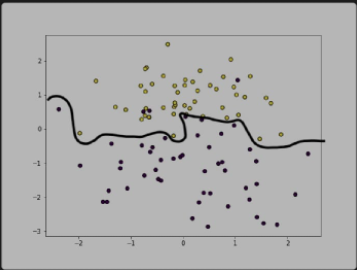

São utilizadas duas formas para a estimação e avaliação do desempenho de um modelo:

* OOS (out-of-sample): dividimos a base de dados em treinamento e teste. O modelo é estimado no treinamento, e o seu desempenho é avaliado no teste. 

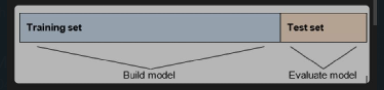

* CVAL (cross-validation): dividimos a base de dados em `k` subconjuntos. A ideia é de que sejam estimados `k` modelos diferentes e as métricas de avaliação do modelo final sejam calculadas como uma média simples das métricas obtidas para cada modelo. O modelo final pode ser ajustado em cima de todo o conjunto de dados. Essa estratégia é cara computacionalmente, por isso é aplicada preferencialmente em conjuntos de dados pequenos.

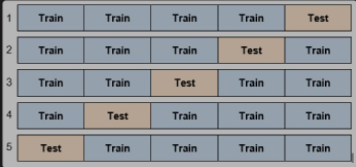

##### model_selection.train_test_split( )

Realiza a divisão das bases de treinamento e teste (OOS) a serem utilizadas pelo modelo.

Argumentos importantes:
* X -> array multidimensional utilizado como variáveis independentes (features)
* y -> array unidimensional utilizado como variável dependente (target)
* test_size -> (default = 0.5) define qual a porcentagem dos dados a ser utilizada como período de teste. 
* shuffle -> (default = True) define se ocorrerá ou não a divisão do dataframe de forma sortida (escolhemos linhas aleatórias). Ativar essa função como `True` é interessante quando tratamos de séries temporais, nas quais a ordem com a qual os dados são previamente distribuídos importa.

**Obs.:** A função train_test_split() retorna uma tupla com 4 elementos, que são respectivamente: x_treino, x_teste, y_treino, y_teste

> `x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, shuffle = False)`

##### model_selection.KFold

É um objeto que realiza a divisão do dataframe em `k` subconjuntos de treino/teste, onde podemos estimar o mesmo modelo iterativamente.

Argumentos importantes:
* n_splits -> número de subconjuntos a serem criados 
* shuffle -> (default = True) define se ocorrerá ou não a divisão do dataframe de forma sortida (escolhemos linhas aleatórias). Ativar essa função como `True` é interessante quando tratamos de séries temporais, nas quais a ordem com a qual os dados são previamente distribuídos importa.

Métodos importantes:
* split(X) -> retorna uma lista de tamanho `k` com várias tuplas contendo: (índices das linhas a serem usadas como treino, índices das linhas a serem usadas como teste). Para cada iteração, filtramos o dataframe com base nesses índices e realizamos as previsões, salvando os resultados das avaliações em uma ou mais listas.

> `kf = KFold(n_splits = 5, shuffle = True)`

> `for idx_treino, idx_teste in kf.split(X):`

>    `X_treino, X_teste = X[idx_treino], X[idx_teste]`

>    `y_treino, y_teste = y[idx_treino], y[idx_teste]`



## Otimização de hiper-parâmetros

Os hiperparâmetros são parâmetros ajustáveis que permitem controlar o processo de treinamento de um modelo. Cada modelo possui hiperparâmetros distintos que podem ser ajustados ao instanciarmos sua classe (veja abaixo em "Modelagem"), e podemos avaliar o desempenho de diferentes modelos contendo combinações distintas de valores de hiperparâmetros para encontrar o melhor, ou seja, otimizando-os.

##### model_selection.GridSearchCV

Realiza um loop onde são criados modelos com diferentes combinações dos parâmetros escolhidos, e possui métodos que retornam a métrica de avaliação escolhida para cada um (calculada com cross-validation, daí vem o "CV"). 

Argumentos importantes:
* estimator -> modelo a ser otimizado
* param_grid -> dicionário com os hiperparâmetros a serem testados e combinados
* scoring -> string contendo a métricas de avaliação a ser maximizada
* cv -> número de subconjuntos a serem criados para a validação cruzada.

Métodos importantes:
* fit() -> realiza o ajuste dos modelos testados

Atributos importantes:
* best\_params\_ -> retorna um dicionário com os parâmetros do modelo que apresentou melhor desempenho.
* best\_score\_ -> retorna o valor da métrica de avaliação do melhor estimador
* cv\_results\_ -> retorna o valor da métrica de avaliação obtida em cada modelo testado (permite analisar graficamente)

> param_grid = {'max_depth' : [5, 15, 25], 'min_samples_leaf' : [1, 3], 'max_leaf_nodes' : [10, 20, 35, 50]}

> modelo = DecisionTreeClassifier()

> gs = GridSearchCV(modelo, param_grid, scoring='f1', cv=5)

> gs.fit(X, y)

> print("best score:", gs.best_score_)



##### model_selection.RandomizedSearchCV

## Modelagem

Todos os modelos criados são objetos que herdam características semelhantes com base na tarefa desempenhada (classificação, regressão e clusterização), por isso métodos específicos podem ser aplicados a objetos diferentes. 

Inicialmente, o modelo é instanciado como um objeto onde podem ser alterados seus parâmetros (que podem ser otimizados).

Posteriormente, o modelo é ajustado em cima de uma base de dados (arrays n-dimensionais X e y). A partir daí podemos extrair métricas de avaliação de desempenho, realizar previsões entre outros.

Métodos aplicáveis aos estimadores:

* fit(X, y) -> ajusta o modelo e salva os resultados no objeto dele
* predict(X) -> aplica o modelo em um conjunto de variáveis independentes (array) e retorna outro array com as previsões obtidas

## Avaliação

As métricas de avaliação podem ser divididas entre os três tipos de modelos, que fazem previsões de forma diferente (categórica e contínua).

#### Métricas de Avaliação de Dados Categóricos:

##### metrics.confusion_matrix( )

Realiza uma comparação entre os valores obtidos em duas colunas de valores categóricos. Quando a resposta é binária(0 ou 1), temos a tabela com os valores obtidos que batem ou não (True Positive, False Negative, False Positive, True Negative). 

> `confusion_matrix(y_obs, y_pred)`

**Obs.:** A matriz de confusão retornada é uma versão ao contrário da comum, assim como a tabela abaixo.

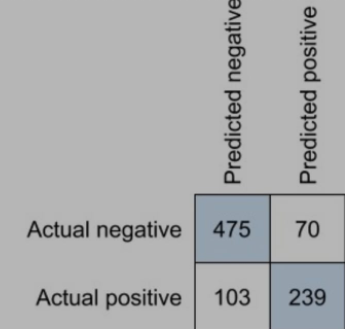

##### metrics.roc_curve( ) e metrics.auc( )

Retorna uma tupla contendo diversos valores para a matriz de confusão, que podem ser acessados separadamente para calcularmos a área (AUC) abaixo da curva "Receiver Operating Characteristic" (ROC)

> `fpr, tpr, thresholds = roc_curve(y_train, y_pred_train)`
> 
> `auc = auc(fpr, tpr)`

##### metrics.accuracy_score( )

Retorna a acurácia do modelo, ou seja, a % de acertos em relação ao total de previsões realizadas.

Cálculo: (TP + TN) / (TP + TN + FP + FN)

> `accuracy_score(y_obs, y_pred)`

**Obs.:** Esta não é uma boa métrica de avaliação em conjuntos de dados que não são distribuídos igualmente. Em um dataset no qual 99% do target equivale a um mesmo valor, um modelo que prevê que ocorrerá sempre esse valor obtêm uma acurácia de 99%.

##### metrics.precision_score( )

A precisão mede qual a taxa de acerto do modelo em suas previsões positivas.

Cálculo: TP / (TP + FP)

> `precision_score(y_obs, y_pred)`

##### metrics.recall_score( )

A revocação mede a taxa de acerto do modelo em suas previsões referentes aos valores que são positivos no conjunto de teste.

Cálculo: TP / (TP + FN).

> `recall_score(y_obs, y_pred)`

##### metrics.f1_score( )

A estatística F1 calcula uma média harmônica entre a precisão e o recall de um modelo (penalizando valores menores), a fim de maximizar ambos ao mesmo tempo. 

Cálculo: 2 * (precisão * recall) / (precisão + recall)

> `f1_score(y_obs, y_pred)`

#### Métricas de Avaliação de Dados Contínuos:

##### metrics.score( )

É semelhante ao R-Quadrado no caso de regressões lineares, ou à acurácia em modelos de classificação. É o percentual de explicação do modelo em relação aos valores reais da variável dependente. Varia entre 0 e 1, sendo que em 1 assumimos que o modelo apresenta capacidade preditiva perfeita, sendo assim, toda a variação em Y é explicada pelo modelo.

> score(y_obs, y_pred)

##### metrics.mean_absolute_error( )

É a média do módulo do valor dos resíduos (diferença entre valores previstos e observados) de um modelo regressivo.

O interessante de se avaliar são os desvios entre a previsão e os valores corretos, e não o seu sinal (positivos ou negativos). Por isso é tirado o módulo de cada resíduo antes de calcular a média.

> mean_absolute_error(y_obs, y_pred)

##### np.sqrt(metrics.mean_absolute_error( ))

Também conhecido como Raiz Quadrática Média, é outra forma de se calcular o valor médio dos desvios (erro) de um modelo. Ao invés de se utilizar o módulo dos resíduos, eles são elevados ao quadrado e posteriormente é tirada sua raiz quadrada.

> mean_squared_error(y_obs, y_pred, squared = False)